In [1]:
import numpy as np
import pandas as pd

import os
import cv2

import matplotlib.pyplot as plt

from keras.models import  Sequential
from keras.metrics import Precision, Recall
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPool2D, SeparableConv2D, BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping, LambdaCallback, ModelCheckpoint
import keras.backend as K
from tensorflow.keras.applications.inception_v3 import preprocess_input

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score


import tensorflow as tf

import time

import seaborn as sns

### Import files

In [2]:
image_size = (180, 180)

In [3]:
def load_data(folder, max_elements=None):
    path = os.path.join("input", folder)
    if not os.path.exists(path):
        print(f"Error: Folder '{folder}' does not exist.")
        return None

    files = os.listdir(path)
    if len(files) == 0:
        print(f"Error: No files found in folder '{folder}'.")
        return None

    if max_elements is not None:
        files = files[:max_elements]

    data = []
    num_processed = 0
    num_total = len(files)
    for file in files:
        if file != '.DS_Store':
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0

            data.append(img)

            num_processed += 1
            print(f"Processed image {num_processed}/{num_total}")
    return np.array(data)

In [4]:
def load_all_data():
    train_normal = load_data('train/NORMAL')
    train_pneumonia = load_data('train/PNEUMONIA')

    test_normal = load_data('test/NORMAL')
    test_pneumonia = load_data('test/PNEUMONIA')

    val_normal = load_data('val/NORMAL')
    val_pneumonia = load_data('val/PNEUMONIA')

    normal_images = np.concatenate((train_normal, test_normal, val_normal), axis=0)
    pneumonia_images = np.concatenate((train_pneumonia, test_pneumonia, val_pneumonia), axis=0)

    all_images = np.concatenate((normal_images, pneumonia_images), axis=0)
    all_labels = np.concatenate((np.zeros(len(normal_images)), np.ones(len(pneumonia_images))), axis=0)
    
    return normal_images, pneumonia_images, all_images, all_labels

In [5]:
normal_images, pneumonia_images, all_images, all_labels = load_all_data()

Processed image 1/1342
Processed image 2/1342
Processed image 3/1342
Processed image 4/1342
Processed image 5/1342
Processed image 6/1342
Processed image 7/1342
Processed image 8/1342
Processed image 9/1342
Processed image 10/1342
Processed image 11/1342
Processed image 12/1342
Processed image 13/1342
Processed image 14/1342
Processed image 15/1342
Processed image 16/1342
Processed image 17/1342
Processed image 18/1342
Processed image 19/1342
Processed image 20/1342
Processed image 21/1342
Processed image 22/1342
Processed image 23/1342
Processed image 24/1342
Processed image 25/1342
Processed image 26/1342
Processed image 27/1342
Processed image 28/1342
Processed image 29/1342
Processed image 30/1342
Processed image 31/1342
Processed image 32/1342
Processed image 33/1342
Processed image 34/1342
Processed image 35/1342
Processed image 36/1342
Processed image 37/1342
Processed image 38/1342
Processed image 39/1342
Processed image 40/1342
Processed image 41/1342
Processed image 42/1342
P

Processed image 336/1342
Processed image 337/1342
Processed image 338/1342
Processed image 339/1342
Processed image 340/1342
Processed image 341/1342
Processed image 342/1342
Processed image 343/1342
Processed image 344/1342
Processed image 345/1342
Processed image 346/1342
Processed image 347/1342
Processed image 348/1342
Processed image 349/1342
Processed image 350/1342
Processed image 351/1342
Processed image 352/1342
Processed image 353/1342
Processed image 354/1342
Processed image 355/1342
Processed image 356/1342
Processed image 357/1342
Processed image 358/1342
Processed image 359/1342
Processed image 360/1342
Processed image 361/1342
Processed image 362/1342
Processed image 363/1342
Processed image 364/1342
Processed image 365/1342
Processed image 366/1342
Processed image 367/1342
Processed image 368/1342
Processed image 369/1342
Processed image 370/1342
Processed image 371/1342
Processed image 372/1342
Processed image 373/1342
Processed image 374/1342
Processed image 375/1342


Processed image 667/1342
Processed image 668/1342
Processed image 669/1342
Processed image 670/1342
Processed image 671/1342
Processed image 672/1342
Processed image 673/1342
Processed image 674/1342
Processed image 675/1342
Processed image 676/1342
Processed image 677/1342
Processed image 678/1342
Processed image 679/1342
Processed image 680/1342
Processed image 681/1342
Processed image 682/1342
Processed image 683/1342
Processed image 684/1342
Processed image 685/1342
Processed image 686/1342
Processed image 687/1342
Processed image 688/1342
Processed image 689/1342
Processed image 690/1342
Processed image 691/1342
Processed image 692/1342
Processed image 693/1342
Processed image 694/1342
Processed image 695/1342
Processed image 696/1342
Processed image 697/1342
Processed image 698/1342
Processed image 699/1342
Processed image 700/1342
Processed image 701/1342
Processed image 702/1342
Processed image 703/1342
Processed image 704/1342
Processed image 705/1342
Processed image 706/1342


Processed image 1002/1342
Processed image 1003/1342
Processed image 1004/1342
Processed image 1005/1342
Processed image 1006/1342
Processed image 1007/1342
Processed image 1008/1342
Processed image 1009/1342
Processed image 1010/1342
Processed image 1011/1342
Processed image 1012/1342
Processed image 1013/1342
Processed image 1014/1342
Processed image 1015/1342
Processed image 1016/1342
Processed image 1017/1342
Processed image 1018/1342
Processed image 1019/1342
Processed image 1020/1342
Processed image 1021/1342
Processed image 1022/1342
Processed image 1023/1342
Processed image 1024/1342
Processed image 1025/1342
Processed image 1026/1342
Processed image 1027/1342
Processed image 1028/1342
Processed image 1029/1342
Processed image 1030/1342
Processed image 1031/1342
Processed image 1032/1342
Processed image 1033/1342
Processed image 1034/1342
Processed image 1035/1342
Processed image 1036/1342
Processed image 1037/1342
Processed image 1038/1342
Processed image 1039/1342
Processed im

Processed image 1319/1342
Processed image 1320/1342
Processed image 1321/1342
Processed image 1322/1342
Processed image 1323/1342
Processed image 1324/1342
Processed image 1325/1342
Processed image 1326/1342
Processed image 1327/1342
Processed image 1328/1342
Processed image 1329/1342
Processed image 1330/1342
Processed image 1331/1342
Processed image 1332/1342
Processed image 1333/1342
Processed image 1334/1342
Processed image 1335/1342
Processed image 1336/1342
Processed image 1337/1342
Processed image 1338/1342
Processed image 1339/1342
Processed image 1340/1342
Processed image 1341/1342
Processed image 1/3876
Processed image 2/3876
Processed image 3/3876
Processed image 4/3876
Processed image 5/3876
Processed image 6/3876
Processed image 7/3876
Processed image 8/3876
Processed image 9/3876
Processed image 10/3876
Processed image 11/3876
Processed image 12/3876
Processed image 13/3876
Processed image 14/3876
Processed image 15/3876
Processed image 16/3876
Processed image 17/3876
Pro

Processed image 327/3876
Processed image 328/3876
Processed image 329/3876
Processed image 330/3876
Processed image 331/3876
Processed image 332/3876
Processed image 333/3876
Processed image 334/3876
Processed image 335/3876
Processed image 336/3876
Processed image 337/3876
Processed image 338/3876
Processed image 339/3876
Processed image 340/3876
Processed image 341/3876
Processed image 342/3876
Processed image 343/3876
Processed image 344/3876
Processed image 345/3876
Processed image 346/3876
Processed image 347/3876
Processed image 348/3876
Processed image 349/3876
Processed image 350/3876
Processed image 351/3876
Processed image 352/3876
Processed image 353/3876
Processed image 354/3876
Processed image 355/3876
Processed image 356/3876
Processed image 357/3876
Processed image 358/3876
Processed image 359/3876
Processed image 360/3876
Processed image 361/3876
Processed image 362/3876
Processed image 363/3876
Processed image 364/3876
Processed image 365/3876
Processed image 366/3876


Processed image 660/3876
Processed image 661/3876
Processed image 662/3876
Processed image 663/3876
Processed image 664/3876
Processed image 665/3876
Processed image 666/3876
Processed image 667/3876
Processed image 668/3876
Processed image 669/3876
Processed image 670/3876
Processed image 671/3876
Processed image 672/3876
Processed image 673/3876
Processed image 674/3876
Processed image 675/3876
Processed image 676/3876
Processed image 677/3876
Processed image 678/3876
Processed image 679/3876
Processed image 680/3876
Processed image 681/3876
Processed image 682/3876
Processed image 683/3876
Processed image 684/3876
Processed image 685/3876
Processed image 686/3876
Processed image 687/3876
Processed image 688/3876
Processed image 689/3876
Processed image 690/3876
Processed image 691/3876
Processed image 692/3876
Processed image 693/3876
Processed image 694/3876
Processed image 695/3876
Processed image 696/3876
Processed image 697/3876
Processed image 698/3876
Processed image 699/3876


Processed image 1002/3876
Processed image 1003/3876
Processed image 1004/3876
Processed image 1005/3876
Processed image 1006/3876
Processed image 1007/3876
Processed image 1008/3876
Processed image 1009/3876
Processed image 1010/3876
Processed image 1011/3876
Processed image 1012/3876
Processed image 1013/3876
Processed image 1014/3876
Processed image 1015/3876
Processed image 1016/3876
Processed image 1017/3876
Processed image 1018/3876
Processed image 1019/3876
Processed image 1020/3876
Processed image 1021/3876
Processed image 1022/3876
Processed image 1023/3876
Processed image 1024/3876
Processed image 1025/3876
Processed image 1026/3876
Processed image 1027/3876
Processed image 1028/3876
Processed image 1029/3876
Processed image 1030/3876
Processed image 1031/3876
Processed image 1032/3876
Processed image 1033/3876
Processed image 1034/3876
Processed image 1035/3876
Processed image 1036/3876
Processed image 1037/3876
Processed image 1038/3876
Processed image 1039/3876
Processed im

Processed image 1322/3876
Processed image 1323/3876
Processed image 1324/3876
Processed image 1325/3876
Processed image 1326/3876
Processed image 1327/3876
Processed image 1328/3876
Processed image 1329/3876
Processed image 1330/3876
Processed image 1331/3876
Processed image 1332/3876
Processed image 1333/3876
Processed image 1334/3876
Processed image 1335/3876
Processed image 1336/3876
Processed image 1337/3876
Processed image 1338/3876
Processed image 1339/3876
Processed image 1340/3876
Processed image 1341/3876
Processed image 1342/3876
Processed image 1343/3876
Processed image 1344/3876
Processed image 1345/3876
Processed image 1346/3876
Processed image 1347/3876
Processed image 1348/3876
Processed image 1349/3876
Processed image 1350/3876
Processed image 1351/3876
Processed image 1352/3876
Processed image 1353/3876
Processed image 1354/3876
Processed image 1355/3876
Processed image 1356/3876
Processed image 1357/3876
Processed image 1358/3876
Processed image 1359/3876
Processed im

Processed image 1646/3876
Processed image 1647/3876
Processed image 1648/3876
Processed image 1649/3876
Processed image 1650/3876
Processed image 1651/3876
Processed image 1652/3876
Processed image 1653/3876
Processed image 1654/3876
Processed image 1655/3876
Processed image 1656/3876
Processed image 1657/3876
Processed image 1658/3876
Processed image 1659/3876
Processed image 1660/3876
Processed image 1661/3876
Processed image 1662/3876
Processed image 1663/3876
Processed image 1664/3876
Processed image 1665/3876
Processed image 1666/3876
Processed image 1667/3876
Processed image 1668/3876
Processed image 1669/3876
Processed image 1670/3876
Processed image 1671/3876
Processed image 1672/3876
Processed image 1673/3876
Processed image 1674/3876
Processed image 1675/3876
Processed image 1676/3876
Processed image 1677/3876
Processed image 1678/3876
Processed image 1679/3876
Processed image 1680/3876
Processed image 1681/3876
Processed image 1682/3876
Processed image 1683/3876
Processed im

Processed image 1962/3876
Processed image 1963/3876
Processed image 1964/3876
Processed image 1965/3876
Processed image 1966/3876
Processed image 1967/3876
Processed image 1968/3876
Processed image 1969/3876
Processed image 1970/3876
Processed image 1971/3876
Processed image 1972/3876
Processed image 1973/3876
Processed image 1974/3876
Processed image 1975/3876
Processed image 1976/3876
Processed image 1977/3876
Processed image 1978/3876
Processed image 1979/3876
Processed image 1980/3876
Processed image 1981/3876
Processed image 1982/3876
Processed image 1983/3876
Processed image 1984/3876
Processed image 1985/3876
Processed image 1986/3876
Processed image 1987/3876
Processed image 1988/3876
Processed image 1989/3876
Processed image 1990/3876
Processed image 1991/3876
Processed image 1992/3876
Processed image 1993/3876
Processed image 1994/3876
Processed image 1995/3876
Processed image 1996/3876
Processed image 1997/3876
Processed image 1998/3876
Processed image 1999/3876
Processed im

Processed image 2280/3876
Processed image 2281/3876
Processed image 2282/3876
Processed image 2283/3876
Processed image 2284/3876
Processed image 2285/3876
Processed image 2286/3876
Processed image 2287/3876
Processed image 2288/3876
Processed image 2289/3876
Processed image 2290/3876
Processed image 2291/3876
Processed image 2292/3876
Processed image 2293/3876
Processed image 2294/3876
Processed image 2295/3876
Processed image 2296/3876
Processed image 2297/3876
Processed image 2298/3876
Processed image 2299/3876
Processed image 2300/3876
Processed image 2301/3876
Processed image 2302/3876
Processed image 2303/3876
Processed image 2304/3876
Processed image 2305/3876
Processed image 2306/3876
Processed image 2307/3876
Processed image 2308/3876
Processed image 2309/3876
Processed image 2310/3876
Processed image 2311/3876
Processed image 2312/3876
Processed image 2313/3876
Processed image 2314/3876
Processed image 2315/3876
Processed image 2316/3876
Processed image 2317/3876
Processed im

Processed image 2617/3876
Processed image 2618/3876
Processed image 2619/3876
Processed image 2620/3876
Processed image 2621/3876
Processed image 2622/3876
Processed image 2623/3876
Processed image 2624/3876
Processed image 2625/3876
Processed image 2626/3876
Processed image 2627/3876
Processed image 2628/3876
Processed image 2629/3876
Processed image 2630/3876
Processed image 2631/3876
Processed image 2632/3876
Processed image 2633/3876
Processed image 2634/3876
Processed image 2635/3876
Processed image 2636/3876
Processed image 2637/3876
Processed image 2638/3876
Processed image 2639/3876
Processed image 2640/3876
Processed image 2641/3876
Processed image 2642/3876
Processed image 2643/3876
Processed image 2644/3876
Processed image 2645/3876
Processed image 2646/3876
Processed image 2647/3876
Processed image 2648/3876
Processed image 2649/3876
Processed image 2650/3876
Processed image 2651/3876
Processed image 2652/3876
Processed image 2653/3876
Processed image 2654/3876
Processed im

Processed image 2952/3876
Processed image 2953/3876
Processed image 2954/3876
Processed image 2955/3876
Processed image 2956/3876
Processed image 2957/3876
Processed image 2958/3876
Processed image 2959/3876
Processed image 2960/3876
Processed image 2961/3876
Processed image 2962/3876
Processed image 2963/3876
Processed image 2964/3876
Processed image 2965/3876
Processed image 2966/3876
Processed image 2967/3876
Processed image 2968/3876
Processed image 2969/3876
Processed image 2970/3876
Processed image 2971/3876
Processed image 2972/3876
Processed image 2973/3876
Processed image 2974/3876
Processed image 2975/3876
Processed image 2976/3876
Processed image 2977/3876
Processed image 2978/3876
Processed image 2979/3876
Processed image 2980/3876
Processed image 2981/3876
Processed image 2982/3876
Processed image 2983/3876
Processed image 2984/3876
Processed image 2985/3876
Processed image 2986/3876
Processed image 2987/3876
Processed image 2988/3876
Processed image 2989/3876
Processed im

Processed image 3282/3876
Processed image 3283/3876
Processed image 3284/3876
Processed image 3285/3876
Processed image 3286/3876
Processed image 3287/3876
Processed image 3288/3876
Processed image 3289/3876
Processed image 3290/3876
Processed image 3291/3876
Processed image 3292/3876
Processed image 3293/3876
Processed image 3294/3876
Processed image 3295/3876
Processed image 3296/3876
Processed image 3297/3876
Processed image 3298/3876
Processed image 3299/3876
Processed image 3300/3876
Processed image 3301/3876
Processed image 3302/3876
Processed image 3303/3876
Processed image 3304/3876
Processed image 3305/3876
Processed image 3306/3876
Processed image 3307/3876
Processed image 3308/3876
Processed image 3309/3876
Processed image 3310/3876
Processed image 3311/3876
Processed image 3312/3876
Processed image 3313/3876
Processed image 3314/3876
Processed image 3315/3876
Processed image 3316/3876
Processed image 3317/3876
Processed image 3318/3876
Processed image 3319/3876
Processed im

Processed image 3607/3876
Processed image 3608/3876
Processed image 3609/3876
Processed image 3610/3876
Processed image 3611/3876
Processed image 3612/3876
Processed image 3613/3876
Processed image 3614/3876
Processed image 3615/3876
Processed image 3616/3876
Processed image 3617/3876
Processed image 3618/3876
Processed image 3619/3876
Processed image 3620/3876
Processed image 3621/3876
Processed image 3622/3876
Processed image 3623/3876
Processed image 3624/3876
Processed image 3625/3876
Processed image 3626/3876
Processed image 3627/3876
Processed image 3628/3876
Processed image 3629/3876
Processed image 3630/3876
Processed image 3631/3876
Processed image 3632/3876
Processed image 3633/3876
Processed image 3634/3876
Processed image 3635/3876
Processed image 3636/3876
Processed image 3637/3876
Processed image 3638/3876
Processed image 3639/3876
Processed image 3640/3876
Processed image 3641/3876
Processed image 3642/3876
Processed image 3643/3876
Processed image 3644/3876
Processed im

Processed image 56/234
Processed image 57/234
Processed image 58/234
Processed image 59/234
Processed image 60/234
Processed image 61/234
Processed image 62/234
Processed image 63/234
Processed image 64/234
Processed image 65/234
Processed image 66/234
Processed image 67/234
Processed image 68/234
Processed image 69/234
Processed image 70/234
Processed image 71/234
Processed image 72/234
Processed image 73/234
Processed image 74/234
Processed image 75/234
Processed image 76/234
Processed image 77/234
Processed image 78/234
Processed image 79/234
Processed image 80/234
Processed image 81/234
Processed image 82/234
Processed image 83/234
Processed image 84/234
Processed image 85/234
Processed image 86/234
Processed image 87/234
Processed image 88/234
Processed image 89/234
Processed image 90/234
Processed image 91/234
Processed image 92/234
Processed image 93/234
Processed image 94/234
Processed image 95/234
Processed image 96/234
Processed image 97/234
Processed image 98/234
Processed i

Processed image 174/390
Processed image 175/390
Processed image 176/390
Processed image 177/390
Processed image 178/390
Processed image 179/390
Processed image 180/390
Processed image 181/390
Processed image 182/390
Processed image 183/390
Processed image 184/390
Processed image 185/390
Processed image 186/390
Processed image 187/390
Processed image 188/390
Processed image 189/390
Processed image 190/390
Processed image 191/390
Processed image 192/390
Processed image 193/390
Processed image 194/390
Processed image 195/390
Processed image 196/390
Processed image 197/390
Processed image 198/390
Processed image 199/390
Processed image 200/390
Processed image 201/390
Processed image 202/390
Processed image 203/390
Processed image 204/390
Processed image 205/390
Processed image 206/390
Processed image 207/390
Processed image 208/390
Processed image 209/390
Processed image 210/390
Processed image 211/390
Processed image 212/390
Processed image 213/390
Processed image 214/390
Processed image 

### Visualisation

In [6]:
def visualize_data(normal_data, pneumonia_data):
    if normal_data is None or pneumonia_data is None:
        print("Error: Data is not loaded correctly.")
        return

    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
    labels = ['Normal', 'Pneumonia']

    for i, data in enumerate([normal_data, pneumonia_data]):
        if data is not None:
            for j, img in enumerate(data[:4]):
                axes[i, j].imshow(img, cmap='gray')
                axes[i, j].axis('off')
                axes[i, j].set_title(labels[i])

    plt.tight_layout()
    plt.axis('off')
    plt.show()

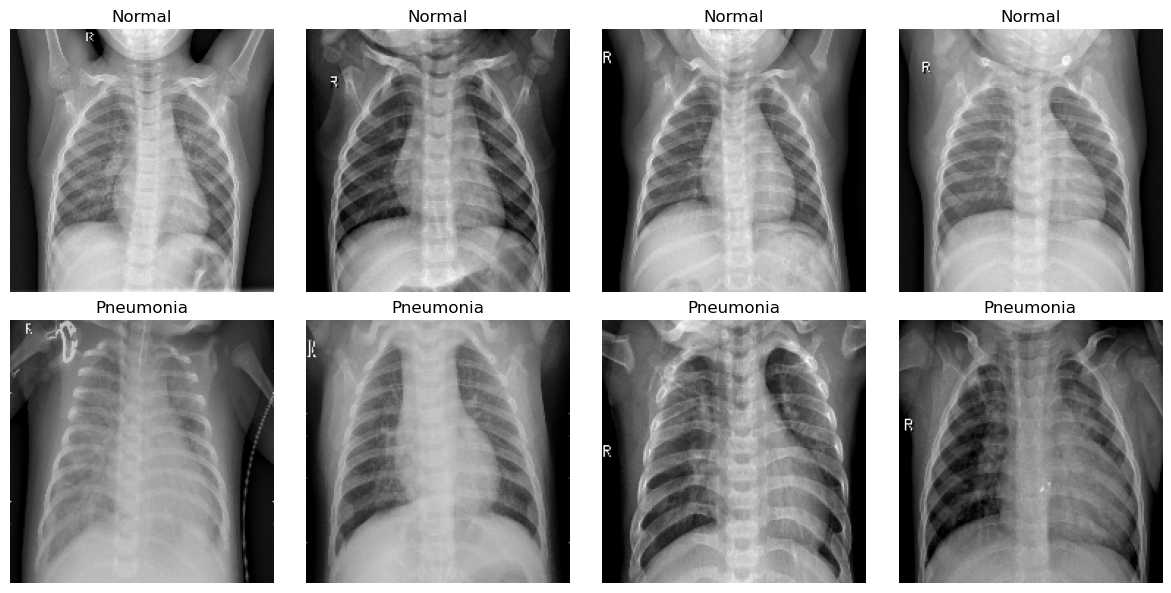

In [7]:
visualize_data(normal_images, pneumonia_images)

In [8]:
def visualize_data_distribution(train_normal, train_pneumonia):
    if train_normal is None or train_pneumonia is None:
        print("Error: Data is not loaded correctly.")
        return

    num_normal = len(train_normal)
    num_pneumonia = len(train_pneumonia)

    labels = ['Normal', 'Pneumonia']

    counts = [num_normal, num_pneumonia]

    plt.bar(labels, counts)
    plt.xlabel('Labels')
    plt.ylabel('Number of samples')
    plt.title(f'Visualize the distribution')
    
    for i in range(len(labels)):
        plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')
    plt.show()

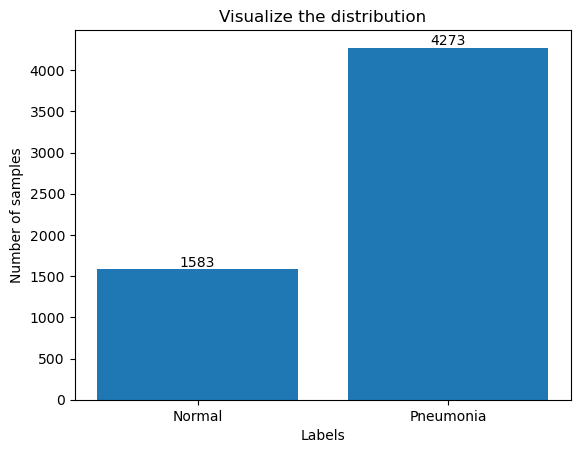

In [9]:
# Visualize distribution data
visualize_data_distribution(normal_images, pneumonia_images)

### Datas

In [10]:
def split_data(images, labels, test_size, val_size):
    train_images, test_val_images, train_labels, test_val_labels = train_test_split(images, labels, test_size=(test_size + val_size), random_state=42)

    test_images, val_images, test_labels, val_labels = train_test_split(test_val_images, test_val_labels, test_size=val_size/(test_size + val_size), random_state=42)

    return train_images, train_labels, val_images, val_labels, test_images, test_labels 

In [11]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(all_images, all_labels, test_size=0.2, val_size=0.2)

#### Correct the imbalance 

In [12]:
initial_bias = np.log([len(pneumonia_images)/len(normal_images)])
initial_bias

array([0.99299438])

In [13]:
poids_0 = (1 / len(normal_images))*len(X_train)/2.0
poids_1 = (1 / len(pneumonia_images))*len(X_train)/2.0

In [14]:
class_weight = {0: poids_0, 1: poids_1}

In [15]:
print('Weight for class 0: {:.2f}'.format(poids_0))
print('Weight for class 1: {:.2f}'.format(poids_1))

Weight for class 0: 1.11
Weight for class 1: 0.41


### Data Augmentation

In [16]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # Ne pas centrer les données par rapport à la moyenne de l'ensemble du dataset
    samplewise_center=False,   # Ne pas centrer les données par rapport à la moyenne de chaque échantillon
    featurewise_std_normalization=False,  # Ne pas normaliser les données en les divisant par l'écart type de l'ensemble du dataset
    samplewise_std_normalization=False,   # Ne pas normaliser les données en les divisant par l'écart type de chaque échantillon
    zca_whitening=False,  # Ne pas appliquer le blanchiment ZCA (décorrélation des features)
#     zca_epsilon=1e-06,  # Valeur d'épison pour la stabilisation du blanchiment ZCA (non utilisée dans ce cas)
#    rotation_range=0,  # Aucune rotation aléatoire des images
#    width_shift_range=0.1,  # Décalage horizontal aléatoire des images de 10% de la largeur totale
#    height_shift_range=0.1,  # Décalage vertical aléatoire des images de 10% de la hauteur totale
#     brightness_range=None,  # Pas de modification aléatoire de la luminosité des images
#     shear_range=0.0,  # Pas de cisaillement aléatoire des images
    zoom_range=0.1,  # Zoom aléatoire des images de 10%
#     channel_shift_range=0.0,  # Pas de décalage aléatoire des canaux de couleur des images
#     fill_mode='nearest',  # Mode de remplissage pour les pixels nouvellement créés lors des transformations (non utilisé dans ce cas)
#     cval=0.0,  # Valeur de remplissage pour les pixels nouvellement créés lors des transformations (non utilisé dans ce cas)
#    horizontal_flip=True,   # Retournement horizontal aléatoire des images
#    vertical_flip=False,    # Pas de retournement vertical aléatoire des images
#     rescale=None,  # Pas de redimensionnement des valeurs des pixels (non utilisé dans ce cas)
#     preprocessing_function=None,  # Fonction de prétraitement supplémentaire à appliquer aux images (non utilisée dans ce cas)
#     data_format=None,  # Format des données (non spécifié dans ce cas)
#     validation_split=0.0,  # Fraction des données à utiliser pour la validation (non utilisée dans ce cas)
#     interpolation_order=1,  # Ordre d'interpolation pour les transformations (non spécifié dans ce cas)
#     dtype=None  # Type de données pour les images (non spécifié dans ce cas)
)

In [17]:
datagen.fit(X_train)

### Model

In [18]:
batch_size = 128
input_shape=(180, 180, 3)

In [19]:
def exponential_decay(lr, s):
    def exponential_decay_fn(epoch):
        return lr * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

In [20]:
learning_rate_scheduler = LearningRateScheduler(exponential_decay_fn)

In [21]:
checkpoint = ModelCheckpoint("cnn_model_lung.h5", save_best_only=True)

In [22]:
"""Reduce learning rate when a metric has stopped improving."""
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.2,
                              verbose=1,
                              patience=2,
                              min_lr=0.000001)

In [23]:
"""Stop training when a monitored metric has stopped improving"""
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0,
    patience=15,
    verbose=2,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
)

In [24]:
"""Callback for creating simple, custom callbacks on-the-fly."""
lambda_callback =  LambdaCallback(on_epoch_end=lambda epoch, 
                                  logs: time.sleep(5), 
                                  on_batch_end=lambda batch,
                                  logs: time.sleep(20))

In [25]:
model = Sequential()

model.add(Input(shape=(180, 180, 3)))

# Convolutional layers
model.add(Conv2D(16, 3, activation='relu'))
model.add(Conv2D(16, 3, activation='relu'))
model.add(Conv2D(16, 3, activation='relu'))
model.add(MaxPool2D())

model.add(SeparableConv2D(32, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(32, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(SeparableConv2D(64, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(64, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(SeparableConv2D(128, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(128, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(MaxPool2D())

model.add(Dropout(0.2))

model.add(SeparableConv2D(256, 3, activation='relu', padding='same'))
model.add(SeparableConv2D(256, 3, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(BatchNormalization())
model.add(MaxPool2D())
          
model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.7))

model.add(Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
          
model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(optimizer=Adam(), 
              loss='binary_crossentropy', 
              metrics=['accuracy', 
                       Precision(name='precision'),
                       Recall(name='recall')
])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 176, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 174, 174, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 16)       0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 87, 87, 32)       688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 87, 87, 32)       1

In [26]:
datagen_train = datagen.flow(X_train, y_train, batch_size=batch_size)
datagen_val= datagen.flow(X_val, y_val, batch_size=batch_size)

In [31]:
history = model.fit(datagen_train,
#                    batch_size=batch_size,
                    epochs=40,
#                     verbose='auto',
                    callbacks=[checkpoint, learning_rate_scheduler],
#                     validation_split=0.0,
                    validation_data=datagen_val,
                    shuffle=True,
                    class_weight=class_weight,
#                     sample_weight=None,
#                     initial_epoch=0,
                    steps_per_epoch=len(X_train)//batch_size,
                    validation_steps=len(X_val)//batch_size,
#                     validation_batch_size=None,
#                     validation_freq=1,
#                     max_queue_size=10,
#                     workers=1,
#                     use_multiprocessing=False
)

Epoch 1/40
27/27 [==============================] - 107s 3s/step - loss: 0.0964 - accuracy: 0.9410 - precision: 0.9784 - recall: 0.9408 - val_loss: 7.0974 - val_accuracy: 0.2752 - val_precision: 1.0000 - val_recall: 0.0060 - lr: 0.0100
Epoch 2/40
27/27 [==============================] - 107s 4s/step - loss: 0.1000 - accuracy: 0.9403 - precision: 0.9780 - recall: 0.9404 - val_loss: 5.2099 - val_accuracy: 0.4462 - val_precision: 1.0000 - val_recall: 0.2387 - lr: 0.0089
Epoch 3/40
27/27 [==============================] - 97s 4s/step - loss: 0.0891 - accuracy: 0.9465 - precision: 0.9793 - recall: 0.9476 - val_loss: 0.5669 - val_accuracy: 0.7873 - val_precision: 0.7872 - val_recall: 0.9689 - lr: 0.0079
Epoch 4/40
27/27 [==============================] - 94s 4s/step - loss: 0.0873 - accuracy: 0.9486 - precision: 0.9825 - recall: 0.9471 - val_loss: 0.4599 - val_accuracy: 0.8438 - val_precision: 0.8284 - val_recall: 0.9917 - lr: 0.0071
Epoch 5/40
27/27 [==============================] - 91s 3s

27/27 [==============================] - 85s 3s/step - loss: 0.0335 - accuracy: 0.9778 - precision: 0.9931 - recall: 0.9768 - val_loss: 0.1303 - val_accuracy: 0.9557 - val_precision: 0.9793 - val_recall: 0.9595 - lr: 1.9953e-04
Epoch 36/40
27/27 [==============================] - 88s 3s/step - loss: 0.0427 - accuracy: 0.9737 - precision: 0.9910 - recall: 0.9732 - val_loss: 0.1571 - val_accuracy: 0.9505 - val_precision: 0.9815 - val_recall: 0.9499 - lr: 1.7783e-04
Epoch 37/40
27/27 [==============================] - 85s 3s/step - loss: 0.0362 - accuracy: 0.9746 - precision: 0.9918 - recall: 0.9736 - val_loss: 0.1374 - val_accuracy: 0.9557 - val_precision: 0.9793 - val_recall: 0.9595 - lr: 1.5849e-04
Epoch 38/40
27/27 [==============================] - 83s 3s/step - loss: 0.0340 - accuracy: 0.9767 - precision: 0.9935 - recall: 0.9748 - val_loss: 0.1397 - val_accuracy: 0.9601 - val_precision: 0.9829 - val_recall: 0.9618 - lr: 1.4125e-04
Epoch 39/40
27/27 [==============================] -


### Visualizing our training progress

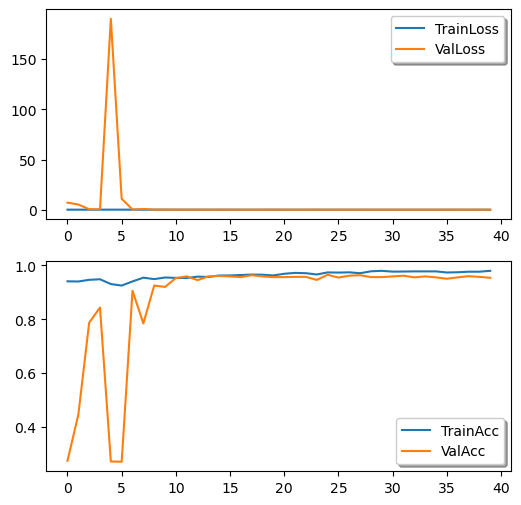

In [32]:
epochs = [i for i in range(40)]
fig, ax = plt.subplots(2, 1, figsize=(6, 6))
ax[0].plot(history.history['loss'], label="TrainLoss")
ax[0].plot(history.history['val_loss'], label="ValLoss")
ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], label="TrainAcc")
ax[1].plot(history.history['val_accuracy'], label="ValAcc")
ax[1].legend(loc='best', shadow=True)
plt.show()

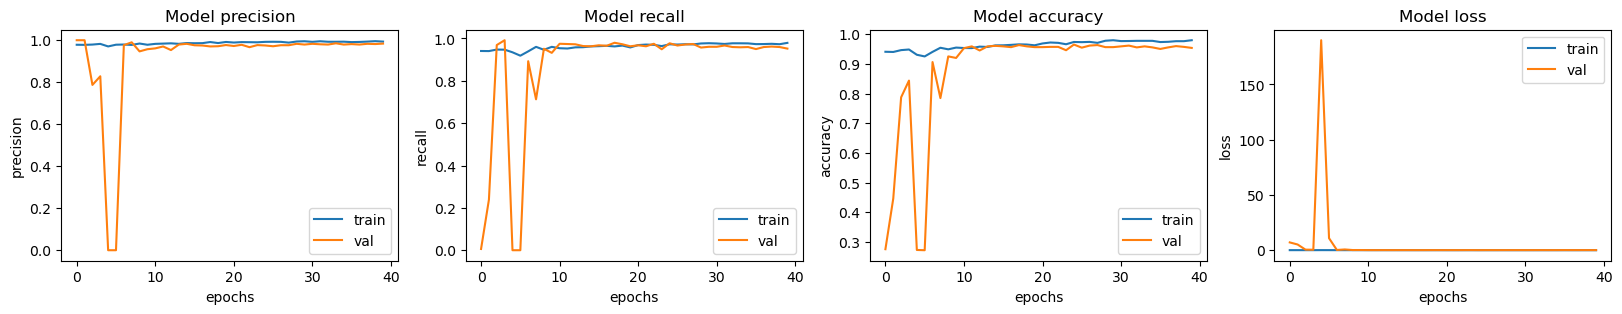

In [33]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [34]:
pred = model.predict(X_train)

110/110 [==============================] - 18s 150ms/step


In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_train, pred)
fpr, tpr, thresholds2 = roc_curve(y_train, pred)

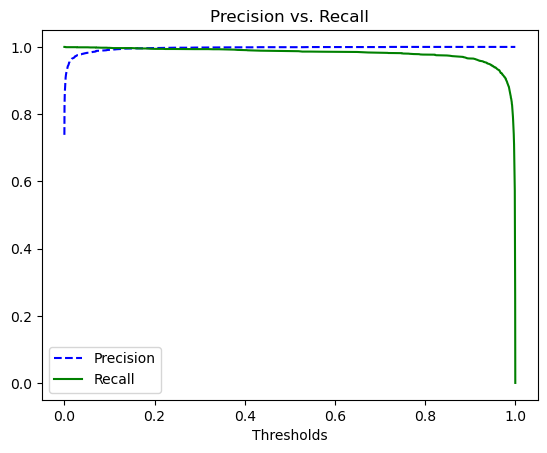

In [36]:
def plot_precision_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--')
    plt.plot(thresholds, recalls[:-1], 'g-')
    plt.title('Precision vs. Recall')
    plt.xlabel('Thresholds')
    plt.legend(['Precision', 'Recall'], loc='best')
    plt.show()
    
plot_precision_recall(precisions, recalls, thresholds)

La courbe de précision et de rappel en fonction du seuil de décision représente la relation entre la précision, le rappel et le seuil utilisé pour classer les exemples positifs et négatifs dans un modèle de classification de manière générale.

Le seuil ici est utilisé afin de déterminer à partir de quelle valeur de prédiction on classe un exemple comme positif ou bien négatif dans notre cas NORMAL ou PNEUMONIA. En augmentant le seuil, le modèle devient plus strict dans la classification des exemples comme positifs.

Les valeurs de précision (precision) et de rappel (recall) sont représentées respectivement sur l'axe vertical. La précision mesure la proportion d'exemples positifs correctement classés parmi tous les exemples classés comme positifs, tandis que le rappel mesure la proportion d'exemples positifs correctement classés parmi tous les exemples réellement positifs.

1. Precision : 
La précision mesure la proportion d'exemples positifs correctement classés parmi tous les exemples classés comme positifs.
 
La courbe de précision (bleue) montre comment la précision du modèle varie en fonction du seuil de décision.

Au début du graphique, lorsque le seuil est proche de 0, tous les exemples sont classés comme positifs, ce qui conduit à une précision relativement faible.

Normal, il y a probablement des exemples négatifs classés à tort comme positifs (ce qui entraîne des faux positifs).

Garde en tete que 
Précision => mesure la précision des prédictions positives.
Une précision de 0.5 signifie que la moitié des exemples classés comme positifs sont effectivement positifs, tandis que l'autre moitié sont des faux positifs. (faux positifs => mon modele a prédit que c'était positif or c'est négatif /// des exemples réellement négatifs classés à tort comme positifs)

À mesure que le seuil augmente, le modèle devient plus strict dans la classification des exemples comme positifs, ce qui augmente la précision.

La courbe de précision peut augmenter progressivement au début, puis augmenter rapidement lorsque le modèle devient plus sélectif dans la classification des exemples comme positifs.

À mesure que le seuil continue d'augmenter, la précision peut atteindre son maximum (1) lorsque le modèle ne classe que les exemples les plus confiants comme positifs.

2. Rappel : 
La courbe de rappel (vert) montre comment le rappel du modèle varie en fonction du seuil de décision.

Au début du graphique, lorsque le seuil est proche de 0, tous les exemples sont classés comme positifs, ce qui conduit à un rappel maximal (1) car tous les exemples réellement positifs sont identifiés.

Normal 
Rappel =>>> mesure la capacité du modèle à identifier correctement les exemples positifs.
Un rappel de 1 indique que tous les exemples positifs sont correctement identifiés, ce qui signifie qu'il n'y a aucun faux négatif. (faux négatifs =>> mon modéle a prédit qu'il était négatif or il est positif /// )

À mesure que le seuil augmente, le modèle devient plus strict, certains exemples positifs peuvent être classés incorrectement comme négatifs, ce qui réduit le rappel.

La courbe de rappel peut diminuer progressivement au début, puis diminuer rapidement lorsque le modèle devient plus sélectif dans la classification des exemples comme positifs.

À mesure que le seuil continue d'augmenter, le rappel peut atteindre son minimum (0) lorsque tous les exemples sont classés comme négatifs.

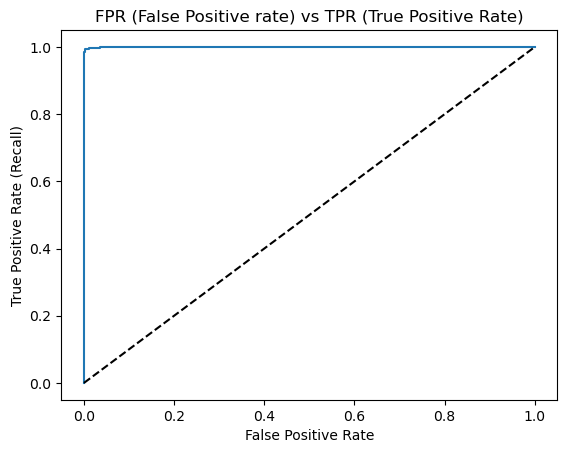

In [37]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title('FPR (False Positive rate) vs TPR (True Positive Rate)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.show()
plot_roc(fpr, tpr)

C'est la courbe ROC (Receiver Operating Characteristic) en utilisant les taux de faux positifs (FPR) et les taux de vrais positifs (TPR).

L'axe horizontal représente le taux de faux positifs (FPR), qui mesure la proportion d'exemples négatifs incorrectement classés comme positifs par rapport au nombre total d'exemples négatifs réels. Il varie de 0 à 1.

L'axe vertical représente le taux de vrais positifs (TPR), également appelé rappel ou sensibilité, qui mesure la proportion d'exemples positifs correctement classés comme positifs par rapport au nombre total d'exemples positifs réels. Il varie également de 0 à 1.

La ligne tracée dans le graphique représente la courbe ROC, qui montre la relation entre le taux de faux positifs et le taux de vrais positifs à différents seuils de classification. Une courbe ROC idéale est celle qui se rapproche le plus possible du coin supérieur gauche du graphique, ce qui indiquerait un taux de faux positifs très faible et un taux de vrais positifs élevé.

Le segment en pointillés (ligne noire en tirets) représente la courbe du taux de faux positifs lorsque le taux de vrais positifs est égal au taux de faux positifs (FPR = TPR). Cette ligne diagonale représente le comportement d'un classificateur aléatoire.

### Evaluate the model

In [38]:
predict_out = model.predict(X_test)
predict_out = predict_out.reshape(1, -1)[0]
threshold = 0.5
predict_out = (predict_out >= threshold).astype(int)

37/37 [==============================] - 5s 136ms/step


In [39]:
accuracy = accuracy_score(y_test, predict_out)
precision = precision_score(y_test, predict_out)
recall = recall_score(y_test, predict_out)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9624252775405636
Precision: 0.975669099756691
Recall: 0.9709443099273608


In [40]:
print(f'F1 score : {(2*precision*recall)/(precision +  recall)}')

F1 score : 0.9733009708737864


In [41]:
classification = classification_report(y_test, predict_out, target_names=['Normal','Pneumonia'])
print(classification)

              precision    recall  f1-score   support

      Normal       0.93      0.94      0.94       345
   Pneumonia       0.98      0.97      0.97       826

    accuracy                           0.96      1171
   macro avg       0.95      0.96      0.95      1171
weighted avg       0.96      0.96      0.96      1171



In [42]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predict_out)

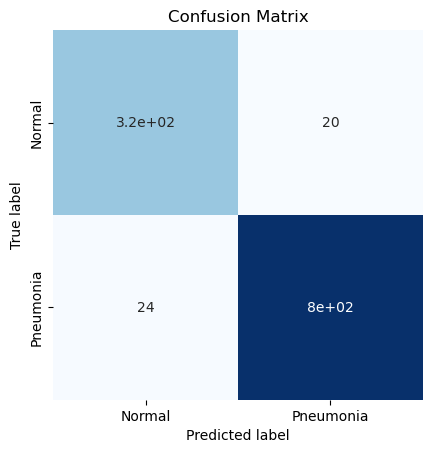

In [52]:
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False, square=True, xticklabels=['Normal','Pneumonia'], yticklabels=['Normal','Pneumonia'])
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Heatmap

In [44]:
img_path = 'input/train/PNEUMONIA/person1000_bacteria_2931.jpeg'

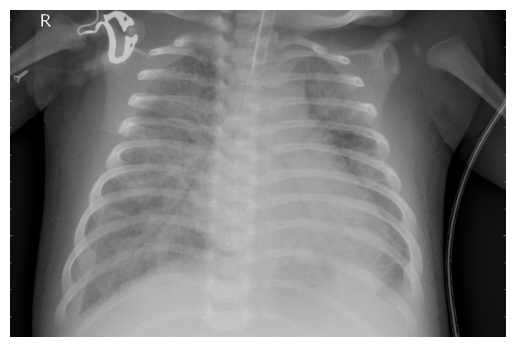

In [45]:
photo = cv2.imread(img_path)

plt.imshow(cv2.cvtColor(photo, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [46]:
img = tf.keras.preprocessing.image.load_img(img_path, target_size=image_size)

In [47]:
x = np.array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [48]:
predict_out = model.predict(x)

threshold = 0.5
predict_out = predict_out.reshape(1, -1)[0]
predict_out = (predict_out >= threshold).astype(int)
print(predict_out)

1/1 [==============================] - 0s 31ms/step
[0]


In [49]:
with tf.GradientTape() as tape:
    last_conv_layer = model.get_layer('separable_conv2d_7')
    iterate = tf.keras.models.Model([model.inputs], [model.output, last_conv_layer.output])
    model_out, last_conv_layer = iterate(x)
    class_out = model_out[:, np.argmax(model_out[0])]
    grads = tape.gradient(class_out, last_conv_layer)
    pooled_grads = K.mean(grads,  axis=(0, 1, 2))

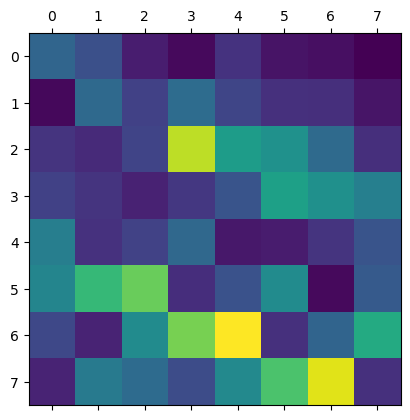

In [50]:
heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer), axis=-1)
heatmap = np.abs(heatmap)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# Ensure that the heatmap array has a size of 64 (8x8)
heatmap = np.resize(heatmap, (8, 8))

# Display the heatmap
plt.matshow(heatmap)
plt.show()

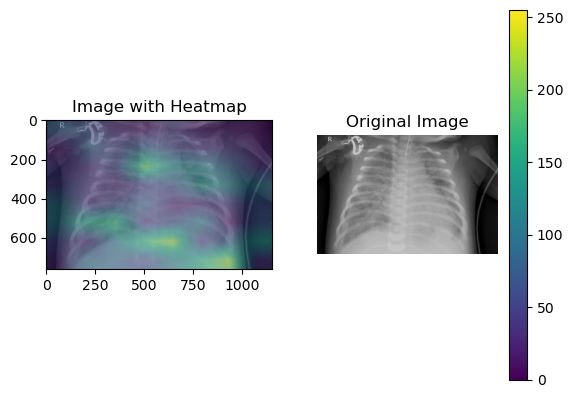

In [51]:
image = cv2.imread('input/train/PNEUMONIA/person1000_bacteria_2931.jpeg')
INTENSITY = 0.5

# Resize the heatmap to match the image size
heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))

# Apply a color map to the heatmap
heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_VIRIDIS)

# Convert the image to a supported depth (8-bit)
img = cv2.convertScaleAbs(image)

# Convert the heatmap to RGB
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

# Add the heatmap to the image
img_with_heatmap = cv2.addWeighted(img, 1 - INTENSITY, heatmap, INTENSITY, 0)

# Display the original image and the image with heatmap
plt.subplot(1, 2 , 1)
plt.imshow(img_with_heatmap)
plt.title("Image with Heatmap")
plt.axis("on")

plt.subplot(1, 2, 2)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.colorbar()

plt.show()